# Math 211 Autumn 2023

## Homework 3 - PART II

*Due: October 20, 2023* 

Submit in Canvas as a .ipynb file.

In this notebook, some parts of the code is given and you will be asked to complete given tasks. These tasks may be given in the code as comments (marked by # or in the form'''comment'''). Point values of each part is also specified in the corresponding cells.


In [1]:
#first, packages are imported. matplotlib.pyplot is what we use to graph a function
import numpy as np
import matplotlib.pyplot as plt

## Newton's Method

### Question 1 (2 points):

Let's first consider Newton's method. Complete missing parts in the code below.

In [3]:
'''Missing parts in this code are given as comments.
Replace them with necessary info below so that when it runs 
output should be iteration number, x1, and the absolute error in the estimate'''

def Newton(f,df,real_value,x0,epsilon,maxiter):
    for i in range(0,maxiter):
        x1=x0-f(x0)/df(x0)#complete code here (1 point)
        x0=x1
        abs_error=np.abs(x0-real_value)#complete code here (1 point)
        if abs_error<epsilon:
            break
        else:
            continue
    return (i,x1,abs_error)
        

In [4]:
#Let's check our code with a well-known example.
def f(x):
    return x**2-4

def df(x):
    return 2*x


Newton(f,df,2,5,0.001,100)

(3, 2.0000051812194735, 5.181219473460175e-06)

## Fixed-Point Iteration

Rest of the notebook is about finding zeros of functions by using fixed point iteration method. This topic is throughly explained in section 2.2 of the 9th Edition of the Numerical Analysis book by Burden and Faires (published by Cengage in 2011).

In [5]:
def FixedPoint(f,real_value,x0,epsilon,maxiter):
    for i in range(1,maxiter):
        x1=f(x0)
        x0=x1
        rel_error=np.abs(x1-real_value)/np.abs(real_value)
        if rel_error<epsilon:
            break
        else:
            continue
    return (i,x1,rel_error)


### Question 2 (2 points): 

Consider function $f(x)=x^2-x-5$. Write three functions that could be used to approximate the zero of $f$. At this point, we don't know if the functions would produce a sequence converging to the zero or not.

Write two functions that could be used in the fixed point algorithm, and converges to the zero of $f$. The first function is given for reference.

In [7]:
real_value=2.79128784747792

In [8]:
def f_1(x):
    return x-x**2+x+5


In [17]:
def f_2(x):
    return 1+5/x#write second function (1 point)


In [10]:
def f_3(x):
    return np.sqrt(x+5)#write third function (1 point)

### Question 3 (2 points): 

By using these functions, write codes below running FixedPoint function defined above. Use following values:

In [11]:
x0=1
epsilon=1e-10 #equals 10**(-10)
max_iter=100

In [18]:
#notice that this algorithm diverges
FixedPoint(f_1,real_value,x0,epsilon,max_iter)

OverflowError: int too large to convert to float

In [19]:
FixedPoint(f_2,real_value,x0,epsilon,max_iter)

(53, 2.7912878476593006, 6.498100452469562e-11)

In [14]:
#write code running FixedPoint algorithm above with f_3 and given values (1 point)
FixedPoint(f_3,real_value,x0,epsilon,max_iter)

(14, 2.7912878474101843, 2.4266789601080836e-11)

In [1]:
#Which of these function iterations resulted in the faster convergence? Write your answer below. (1 point)

The second function converged faster. In particular, let $s$ denote the fixed point, $|f'(s)|\approx 0.179128$ for the second method, whereas $|f'(s)|\approx 0.64174$ for the first method. The first method is roughly 3.5825 times slower than the second, as expected. 

## Plot the sequence

### Question 4 (2 points): 

Now, modify the code for Fixed Point algorithm above so that code collects all iterated values in a list called sequence and gives the result as the last element in the output.

In [20]:
def FixedPoint2(f,real_value,x0,epsilon,maxiter):
    sequence=[]
    for i in range(1,maxiter):
        x1=f(x0)
        x0=x1
        abs_error=np.abs(x1-real_value)
        #write a code that adds sequence elements to sequence (1 point)
        sequence.append(x0)
        if abs_error<epsilon:
            break
        else:
            continue
    return (i,x1,abs_error,sequence)

Now, let's plot the values that we have in the sequence produced for the fastest algorithm. 

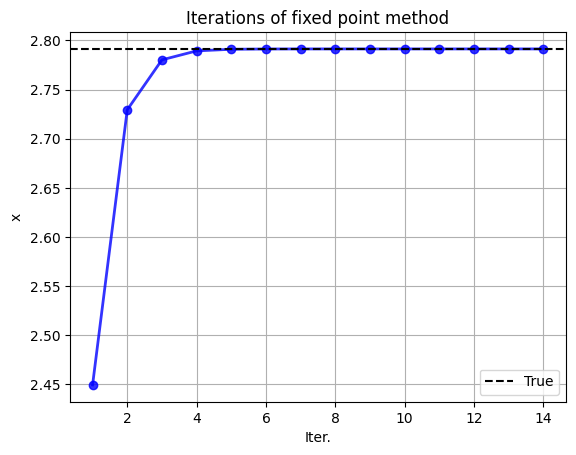

In [32]:
'''write your code below, so that your plot produces the elements of the sequence obtained by using the function that gives
the fastest convergence. (1 point)'''

#write your code here (1 point)
i, x_final, abs_error_final, seq = FixedPoint2(f_3,real_value,x0,epsilon,max_iter)
plt.plot(np.arange(i)+1, seq, "-o", color="blue", alpha=0.8, lw=2.0);
plt.axhline(y=real_value, label="True", color="black", ls="--");
plt.title("Iterations of fixed point method");
plt.xlabel("Iter."); plt.ylabel("x");
plt.legend();
plt.grid(True);
plt.show()